In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

## Data preprocessing

In [2]:
coffee = pd.read_csv(
    "../data/Coffee Bean Kaggle/merged_data_cleaned.csv").drop(columns="Unnamed: 0")

coffee = coffee[coffee["Country.of.Origin"].notna()]

coffee['Country.of.Origin'] = coffee['Country.of.Origin'].str.replace(
    "Taiwan", "China")

coffee["Country.of.Origin"] = coffee["Country.of.Origin"].replace(
    "United States (Hawaii)", "Hawaii"
)

coffee["Country.of.Origin"] = coffee["Country.of.Origin"].replace(
    "Tanzania, United Republic Of", "Tanzania"
)

coffee["Country.of.Origin"] = coffee["Country.of.Origin"].replace(
    "United States (Puerto Rico)", "Puerto Rico"
)

In [3]:
df = coffee[['Country.of.Origin', 'Farm.Name','Company','Altitude','Variety', 'Processing.Method', 'Color',\
   'altitude_mean_meters', 'Harvest.Year', 'Grading.Date',
   'Aroma', 'Flavor','Aftertaste','Acidity', 'Body',
   'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
   'Total.Cup.Points', 'Moisture', 'Category.One.Defects',  'Category.Two.Defects', 'Quakers']].copy()

In [18]:
ten_countries = list(df.groupby('Country.of.Origin').size().sort_values(ascending = False)[:18].index)
ind= df['Country.of.Origin'].apply(lambda x: x in ten_countries)

In [19]:
characteristics = ['Aroma', 'Flavor','Aftertaste','Acidity', 'Body',
   'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points']

df_profiles = pd.DataFrame(columns=['country']+characteristics)

for country in ten_countries:
    temp = [
        df[df['Country.of.Origin'] == country][item].median()
        for item in characteristics
    ]
    df_profiles.loc[len(df_profiles)] = [country]+temp
df_profiles

country  Aroma  Flavor  Aftertaste  Acidity  Body  Balance  \
0        Mexico  7.500    7.42       7.250     7.42  7.42     7.33   
1      Colombia  7.670    7.58       7.580     7.58  7.67     7.67   
2     Guatemala  7.580    7.50       7.330     7.58  7.50     7.50   
3        Brazil  7.500    7.58       7.420     7.50  7.50     7.50   
4         China  7.500    7.50       7.330     7.42  7.50     7.50   
5        Hawaii  7.500    7.58       7.500     7.67  7.67     7.67   
6      Honduras  7.500    7.42       7.170     7.42  7.42     7.33   
7    Costa Rica  7.670    7.50       7.500     7.67  7.50     7.67   
8      Ethiopia  7.830    7.96       7.830     8.00  7.92     7.92   
9      Tanzania  7.580    7.42       7.420     7.46  7.50     7.46   
10       Uganda  7.875    7.75       7.625     7.71  7.67     7.67   
11     Thailand  7.500    7.54       7.500     7.54  7.58     7.50   
12    Nicaragua  7.330    7.29       7.170     7.25  7.42     7.25   
13        Kenya  7.830    7.83       7.750     7.75  7.75     7.75   
14  El Salvador  7.670    7.67       7.500     7.67  7.58     7.67   
15    Indonesia  7.710    7.58       7.460     7.58  7.58     7.54   
16        India  7.670    7.75       7.670     7.75  7.71     7.71   
17       Malawi  7.580    7.42       7.330     7.42  7.33     7.42   

    Uniformity  Clean.Cup  Sweetness  Cupper.Points  
0         10.0       10.0      10.00           7.33  
1         10.0       10.0      10.00           7.58  
2         10.0       10.0      10.00           7.42  
3         10.0       10.0      10.00           7.50  
4         10.0       10.0      10.00           7.33  
5         10.0       10.0      10.00           7.58  
6         10.0       10.0      10.00           7.33  
7         10.0       10.0      10.00           7.67  
8         10.0       10.0      10.00           8.00  
9         10.0       10.0      10.00           7.50  
10        10.0       10.0      10.00           7.67  
11        10.0       10.0      10.00           7.50  
12        10.0       10.0      10.00           7.25  
13        10.0       10.0      10.00           7.83  
14        10.0       10.0      10.00           7.58  
15        10.0       10.0      10.00           7.54  
16        10.0       10.0       7.75           7.83  
17        10.0       10.0      10.00           7.33

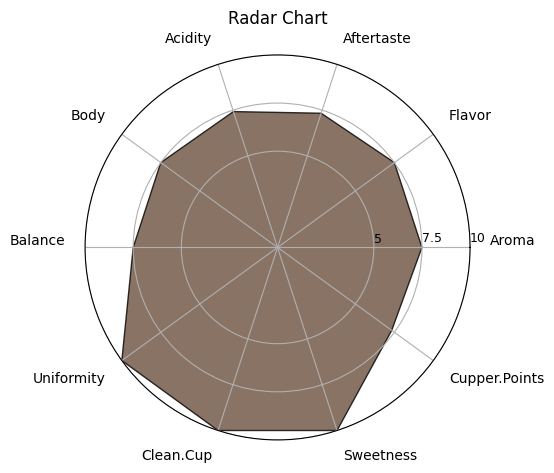

In [7]:
def make_radar_plot(df,k):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[k].drop('country').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    f = plt.figure(figsize=(5,5))
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], list(categories), color='k', size=10)
    for label,i in zip(ax.get_xticklabels(), range(len(angles))):# adjust label position
        angle_rad=angles[i]

        if angle_rad <= np.pi/2:
            ha= 'left'
            va= "bottom"

        elif np.pi/2 < angle_rad <= np.pi:
            ha= 'right'
            va= "bottom"

        elif np.pi < angle_rad <= (3*np.pi/2):
            ha= 'right'
            va= "top"  

        else:
            ha= 'left'
            va= "top"

        label.set_verticalalignment(va)
        label.set_horizontalalignment(ha)

    #ax.tick_params(axis='x', pad=10)
    # Draw ylabels
    ax.set_rlabel_position(1)
    plt.yticks([5,7.5,10], ["5", "7.5", "10"], color="k", size=9)
    plt.ylim(0,10)

    # Fill area
    plt.fill(angles, values,facecolor='#6C503D', edgecolor='black',alpha=0.8)
    plt.title("Radar Chart", fontsize=12)
    plt.show();
    
make_radar_plot(df_profiles, 4)

In [8]:
import plotly.io as pio

In [10]:
def make_radar_plot_plotly(df, k):  # sourcery skip: use-fstring-for-formatting
    categories = list(df)[1:]
    N = len(categories)

    values = df.loc[k].drop('country').values.flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]


    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=[x * 180 / np.pi for x in angles[:-1]],
        fill='toself',
        fillcolor='#6C503D',
        line=dict(color='black'),
        marker=dict(color='#6C503D'),
        name=df.loc[k, 'country'],
        opacity=0.8
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 10],
                showticklabels=True,
                tickvals=[5, 7.5, 10],
                ticktext=["5", "7.5", "10"],
                tickfont=dict(size=9),
            ),
            angularaxis=dict(
                visible=True,
                tickfont=dict(size=13),
                showline=False,
                showticklabels=True,
                tickvals=[x * 180 / np.pi for x in angles[:-1]],
                ticktext=categories,
            ),
        ),
        paper_bgcolor='#F3EFE6',
        plot_bgcolor='#F3EFE6',
        showlegend=False,
        title="<b>{}<b>".format(df.loc[k, 'country'])
    )

    pio.write_html(fig, file=f'./pages/plotly_plot{k}.html', auto_open=False)
    
for i in range(19):
    make_radar_plot_plotly(df_profiles,k=i)


In [20]:
df_profiles.country

0          Mexico
1        Colombia
2       Guatemala
3          Brazil
4           China
5          Hawaii
6        Honduras
7      Costa Rica
8        Ethiopia
9        Tanzania
10         Uganda
11       Thailand
12      Nicaragua
13          Kenya
14    El Salvador
15      Indonesia
16          India
17         Malawi
Name: country, dtype: object

In [21]:
round(np.sum(df_profiles,axis=1),2)

c:\Users\jasonluo\miniconda3\envs\anly503\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0     81.67
1     83.33
2     82.41
3     82.50
4     82.08
5     83.17
6     81.59
7     83.18
8     85.46
9     82.34
10    83.97
11    82.66
12    80.96
13    84.49
14    83.34
15    82.99
16    81.84
17    81.83
dtype: float64